# IMPORTS

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler as ss
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder as le
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.ensemble import GradientBoostingRegressor as gbr
from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import GridSearchCV as gscv
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

# DATA PRE-PROCESSING

## data

In [2]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

AttributeError: module 'keras.backend' has no attribute 'tensorflow_backend'

### Taking input and distribution

In [4]:
data=pd.read_csv('output.csv',names=(['length', 'alpha', 'beta', 'flux', 'ja']+[f'ms{i}' for i in range(1,201)]+['max1', 'min1', 'max2', 'min2']))
data

,length,alpha,beta,flux,ja,ms1,ms2,ms3,ms4,ms5,...,ms195,ms196,ms197,ms198,ms199,ms200,max1,min1,max2,min2
0,0.069902,0.812113,38.438948,-1.681073,323.685434,1,0,0,1,0,...,0,0,1,1,0,0,8761.048455,8724.831598,17645.703943,17325.571800
1,0.016766,25.363305,39.369244,2.620376,934.456130,1,0,0,0,1,...,0,0,0,1,0,0,30261.819111,27673.873145,58485.735757,57169.840233
2,0.088336,0.141976,34.026161,-2.174854,821.765815,0,0,1,1,1,...,0,0,1,1,0,0,5705.949563,5340.270545,11285.606444,10805.147664
3,0.062271,11.061218,8.642271,-4.835824,517.301044,0,1,1,0,0,...,1,1,1,1,0,1,4935.107964,4670.055929,9940.021351,9287.187535
4,0.063165,28.651174,36.922439,0.082215,865.096945,0,1,1,1,0,...,0,1,1,0,0,0,492.969310,477.546060,990.839622,948.770304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.096404,22.798822,14.473361,0.154883,49.339827,1,1,1,1,0,...,0,0,1,0,0,1,406.561256,390.708672,805.502554,787.732198
3996,0.050215,5.248490,17.668096,0.573389,475.004608,1,0,0,0,0,...,0,1,0,0,1,1,4994.390641,4862.627123,10073.970746,9633.634253
3997,0.040185,44.816921,27.458135,-0.346343,172.152538,1,0,0,0,0,...,1,1,0,1,1,0,1803.331343,1783.673945,3717.884642,3450.073022
3998,0.052694,1.293693,3.679471,1.579100,653.966227,0,1,0,1,0,...,0,1,0,1,1,0,1689.320337,1673.902295,3391.765202,3334.637079


In [112]:
data.describe()

,length,alpha,beta,flux,ja,ms1,ms2,ms3,ms4,ms5,...,ms195,ms196,ms197,ms198,ms199,ms200,max1,min1,max2,min2
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,...,4000.000000,4000.000000,4000.00000,4000.000000,4000.00000,4000.000000,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03
mean,0.050353,24.845344,24.945294,-0.031711,498.181171,0.502500,0.501750,0.502250,0.51275,0.497500,...,0.499500,0.509000,0.49850,0.490500,0.49275,0.502500,1.518106e+04,1.446393e+04,3.043877e+04,2.885923e+04
std,0.028591,14.312961,14.323038,2.896234,287.200403,0.500056,0.500059,0.500057,0.49990,0.500056,...,0.500062,0.499981,0.50006,0.499972,0.50001,0.500056,4.022832e+04,3.844000e+04,8.056072e+04,7.680726e+04
min,0.001022,0.055392,0.066793,-4.997874,2.530715,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,1.962088e+02,1.697549e+02,3.832233e+02,3.502090e+02
25%,0.025704,12.641571,12.516574,-2.566832,252.822226,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,2.586772e+03,2.436745e+03,5.178117e+03,4.874154e+03
50%,0.050312,24.603609,25.251712,-0.099113,494.297374,1.000000,1.000000,1.000000,1.00000,0.000000,...,0.000000,1.000000,0.00000,0.000000,0.00000,1.000000,5.435216e+03,5.169348e+03,1.091040e+04,1.029925e+04
75%,0.075090,37.164459,37.418845,2.527587,745.832955,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.219510e+04,1.163850e+04,2.445070e+04,2.320442e+04
max,0.099985,49.996496,49.998061,4.994040,999.743816,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.115231e+06,1.058974e+06,2.202406e+06,2.142697e+06


C:\Users\shriv\AppData\Local\Temp\ipykernel_5480\740266207.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[j],color='green')
C:\Users\shriv\AppData\Local\Temp\ipykernel_5480\740266207.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[j],color='green')
C:\Users\shriv\AppData\Local

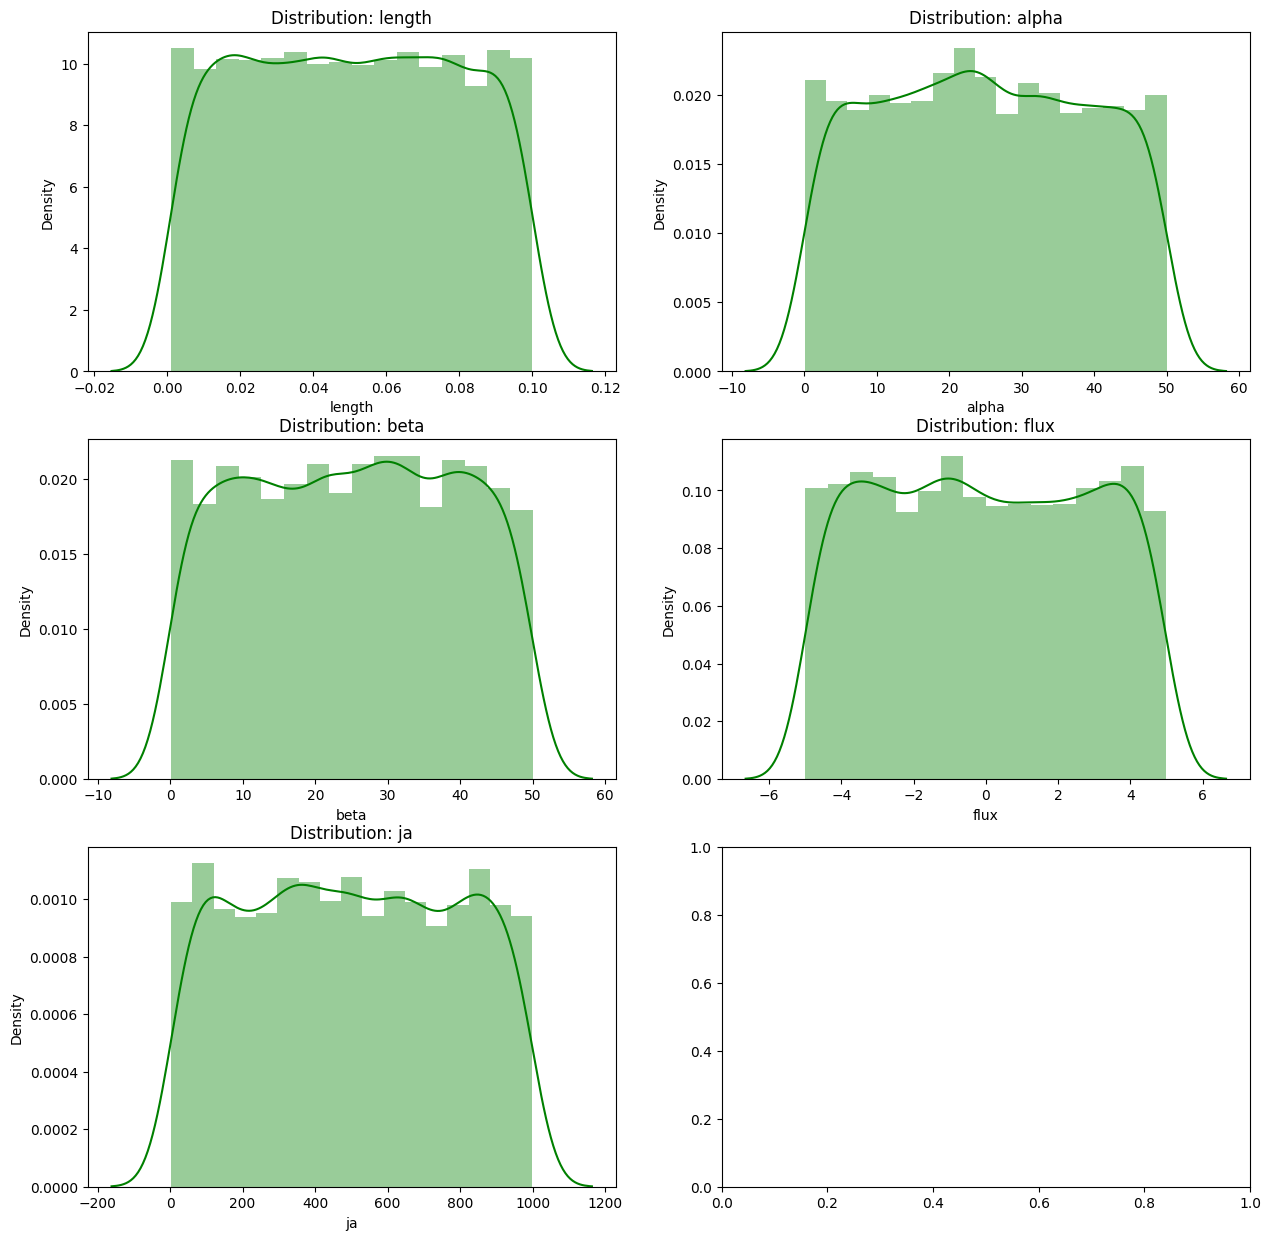

In [114]:
column=['length', 'alpha', 'beta', 'flux', 'ja']
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (15,15))
for i,j in enumerate(column):
    plt.subplot(3,2,i+1)
    sns.distplot(data[j],color='green')
    plt.title(f"Distribution: {j}")
plt.show()

### Data -- Feature correlation with target variables

In [113]:
corr=data.corr()
k=corr[['length', 'alpha', 'beta', 'flux', 'ja']]['max1':]
k.insert(5,"microstructure",corr[[f'ms{j}' for j in range(1,201)]]['max1':].mean(axis=1))
k, k.mean()

(        length     alpha      beta      flux        ja  microstructure
 max1 -0.376501 -0.165634  0.146701  0.112126  0.035541    3.188350e-05
 min1 -0.374585 -0.168791  0.146424  0.111044  0.035196    6.868216e-05
 max2 -0.377006 -0.166089  0.146920  0.111903  0.034988    7.311285e-07
 min2 -0.374060 -0.168315  0.146189  0.111275  0.035687    9.860506e-05,
 length           -0.375538
 alpha            -0.167207
 beta              0.146558
 flux              0.111587
 ja                0.035353
 microstructure    0.000050
 dtype: float64)

### PCA on pure non-modified data with tts

array([ 99.43535908,  99.68589135,  99.92965995,  99.93978305,
        99.94022996,  99.94067059,  99.94110875,  99.9415432 ,
        99.94197337,  99.94240216,  99.94282635,  99.9432486 ,
        99.94366897,  99.94408574,  99.94450117,  99.94491295,
        99.94532405,  99.94573141,  99.94613742,  99.94654234,
        99.94694581,  99.94734819,  99.9477486 ,  99.94814479,
        99.94853899,  99.94893294,  99.94932581,  99.94971668,
        99.95010558,  99.95049378,  99.95088008,  99.95126473,
        99.95164739,  99.95202905,  99.95240858,  99.95278522,
        99.95316162,  99.95353624,  99.95391045,  99.95428353,
        99.95465503,  99.95502415,  99.95539305,  99.95576019,
        99.95612608,  99.95649007,  99.95685198,  99.95721264,
        99.95757258,  99.95793166,  99.95828898,  99.95864456,
        99.95899943,  99.95935371,  99.95970549,  99.96005587,
        99.96040571,  99.96075455,  99.96110136,  99.96144791,
        99.96179322,  99.96213678,  99.9624782 ,  99.96

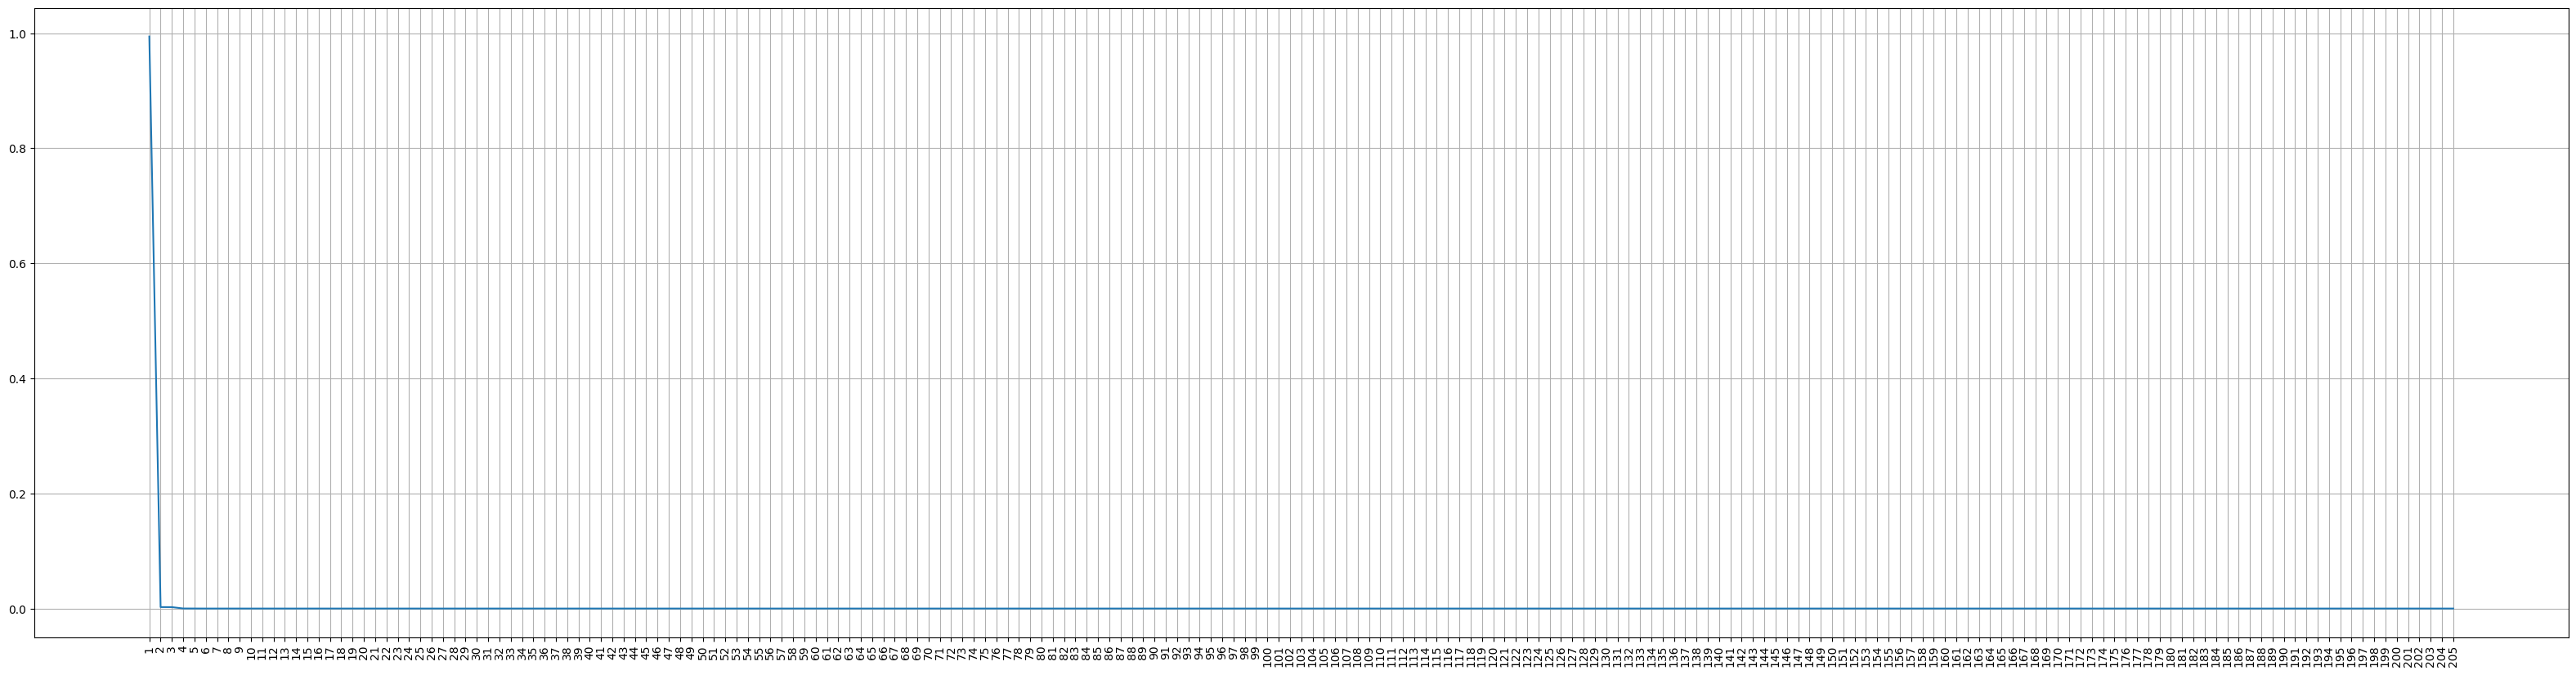

In [115]:
col=['max1','min1','max2','min2']
X=data.drop(columns=col)
pca = PCA()
principal_components = pca.fit_transform(X)
variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(variance_ratio)
cumulative_variance_percentage = cumulative_variance * 100
plt.figure(figsize=(40,10))
sns.lineplot(y=variance_ratio,x=np.linspace(1,205,205))
plt.xticks(np.linspace(1,205,205),np.linspace(1,205,205).astype(int),rotation=90)
plt.grid(True)
cumulative_variance_percentage

In [116]:
pca=PCA(n_components=2)
data_pca=pd.DataFrame(pca.fit_transform(X),columns=['x1','x2'])
for i in col:
    data_pca[i]=data[i]
data_pca

,x1,x2,max1,min1,max2,min2
0,-174.497054,-26.334505,8761.048455,8724.831598,17645.703943,17325.571800
1,436.277717,-10.093353,30261.819111,27673.873145,58485.735757,57169.840233
2,323.583035,-23.582155,5705.949563,5340.270545,11285.606444,10805.147664
3,19.114955,2.330350,4935.107964,4670.055929,9940.021351,9287.187535
4,366.918696,-6.046745,492.969310,477.546060,990.839622,948.770304
...,...,...,...,...,...,...
3995,-448.843812,6.155033,406.561256,390.708672,805.502554,787.732198
3996,-23.180669,-8.230809,4994.390641,4862.627123,10073.970746,9633.634253
3997,-326.025346,11.932594,1803.331343,1783.673945,3717.884642,3450.073022
3998,155.777799,-0.818509,1689.320337,1673.902295,3391.765202,3334.637079


In [137]:
X=data_pca.drop(columns=col).to_numpy()
max1=data_pca['max1'].to_numpy()
min1=data_pca['min1'].to_numpy()
max2=data_pca['max2'].to_numpy()
min2=data_pca['min2'].to_numpy()
x_max1_data_train, x_max1_data_test, max1_data_train, max1_data_test = tts(X,max1,test_size=0.2)
x_min1_data_train, x_min1_data_test, min1_data_train, min1_data_test = tts(X,min1,test_size=0.2)
x_max2_data_train, x_max2_data_test, max2_data_train, max2_data_test = tts(X,max2,test_size=0.2)
x_min2_data_train, x_min2_data_test, min2_data_train, min2_data_test = tts(X,min2,test_size=0.2)

### Normalising the data & PCA with tts

In [117]:
data_Normalise=data.copy(deep=True)
colnew=['length','alpha','beta','flux','ja']
for i in colnew:
    data_Normalise[i] = (data_Normalise[i] - data_Normalise[i].min()) / (data_Normalise[i].max() - data_Normalise[i].min())
data_Normalise

,length,alpha,beta,flux,ja,ms1,ms2,ms3,ms4,ms5,...,ms195,ms196,ms197,ms198,ms199,ms200,max1,min1,max2,min2
0,0.696017,0.015152,0.768500,0.331948,0.322052,1,0,0,1,0,...,0,0,1,1,0,0,8761.048455,8724.831598,17645.703943,17325.571800
1,0.159093,0.506755,0.787131,0.762441,0.934530,1,0,0,0,1,...,0,0,0,1,0,0,30261.819111,27673.873145,58485.735757,57169.840233
2,0.882291,0.001734,0.680122,0.282530,0.821525,0,0,1,1,1,...,0,0,1,1,0,0,5705.949563,5340.270545,11285.606444,10805.147664
3,0.618912,0.220376,0.171746,0.016218,0.516209,0,1,1,0,0,...,1,1,1,1,0,1,4935.107964,4670.055929,9940.021351,9287.187535
4,0.627949,0.572590,0.738128,0.508420,0.864977,0,1,1,1,0,...,0,1,1,0,0,0,492.969310,477.546060,990.839622,948.770304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.963814,0.455405,0.288528,0.515693,0.046940,1,1,1,1,0,...,0,0,1,0,0,1,406.561256,390.708672,805.502554,787.732198
3996,0.497090,0.103984,0.352511,0.557577,0.473794,1,0,0,0,0,...,0,1,0,0,1,1,4994.390641,4862.627123,10073.970746,9633.634253
3997,0.395735,0.896286,0.548581,0.465529,0.170096,1,0,0,0,0,...,1,1,0,1,1,0,1803.331343,1783.673945,3717.884642,3450.073022
3998,0.522135,0.024795,0.072353,0.658230,0.653256,0,1,0,1,0,...,0,1,0,1,1,0,1689.320337,1673.902295,3391.765202,3334.637079


array([  0.73648711,   1.46224892,   2.18350321,   2.90052172,
         3.60953096,   4.3156879 ,   5.01395048,   5.70961309,
         6.40165982,   7.08786002,   7.77242   ,   8.45031615,
         9.12759307,   9.80063054,  10.46963681,  11.13723853,
        11.80161954,  12.4651544 ,  13.12538831,  13.77830811,
        14.4282476 ,  15.07701108,  15.7237195 ,  16.36718238,
        17.00812522,  17.64736761,  18.2839898 ,  18.91832556,
        19.54889696,  20.17785831,  20.80302328,  21.42303776,
        22.0426358 ,  22.65942687,  23.27593304,  23.89000885,
        24.50277794,  25.11127357,  25.71877225,  26.32363838,
        26.92576402,  27.52540252,  28.12158255,  28.7154131 ,
        29.30816547,  29.89921934,  30.48786694,  31.0746173 ,
        31.65944732,  32.24350835,  32.82242652,  33.39934223,
        33.97547796,  34.55081976,  35.12218553,  35.69292045,
        36.26210927,  36.8289738 ,  37.3913856 ,  37.95283815,
        38.51310271,  39.07178218,  39.62834583,  40.18

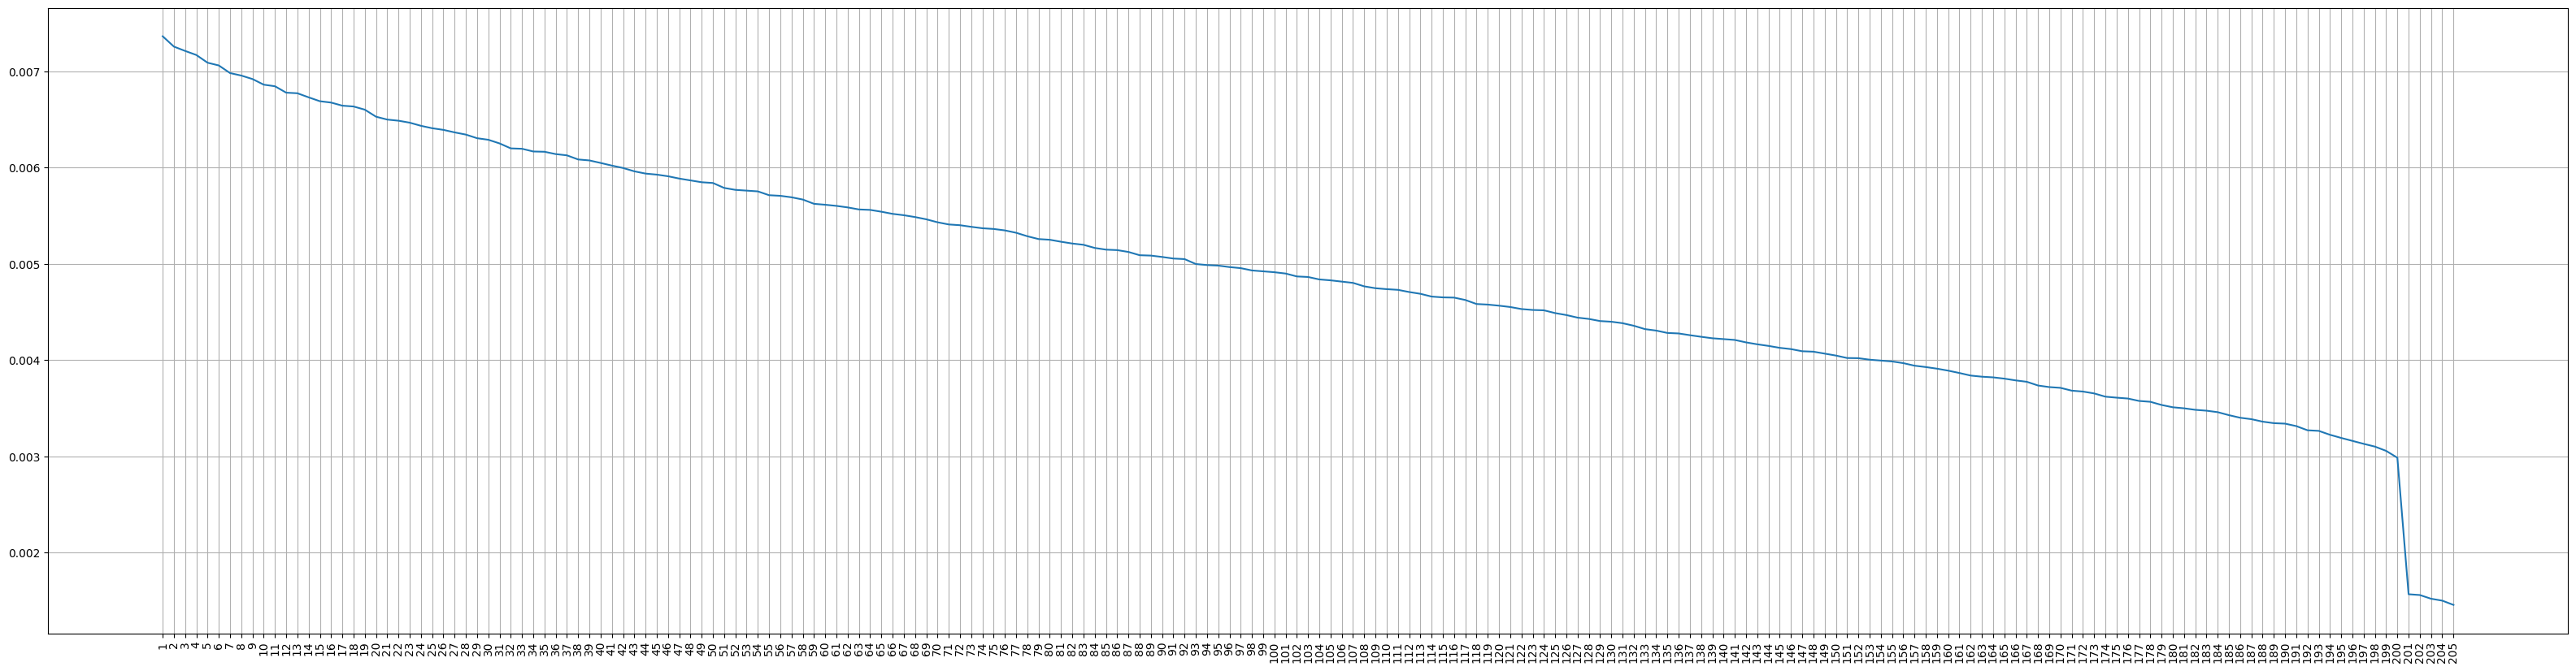

In [118]:
X=data_Normalise.drop(columns=col)
pca = PCA()
principal_components = pca.fit_transform(X)
variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(variance_ratio)
cumulative_variance_percentage = cumulative_variance * 100
plt.figure(figsize=(40,10))
sns.lineplot(y=variance_ratio,x=np.linspace(1,205,205))
plt.xticks(np.linspace(1,205,205),np.linspace(1,205,205).astype(int),rotation=90)
plt.grid(True)
cumulative_variance_percentage

In [119]:
pca=PCA(n_components=201)
data_Normalise_pca=pd.DataFrame(pca.fit_transform(X),columns=[f'x{i}' for i in range(1,202)])
for i in col:
    data_Normalise_pca[i]=data_Normalise[i]
data_Normalise_pca

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x196,x197,x198,x199,x200,x201,max1,min1,max2,min2
0,0.151527,1.270772,-0.513146,-0.023569,-0.129206,-0.099724,-0.030654,0.201115,0.985849,0.303024,...,0.556367,0.576837,0.518773,0.479868,0.038235,0.367137,8761.048455,8724.831598,17645.703943,17325.571800
1,0.759155,-0.038314,-1.298399,0.037365,0.442967,-0.150990,0.310844,0.705357,-0.478098,0.730265,...,-0.194936,-0.519677,0.711564,0.239731,0.934936,-0.103654,30261.819111,27673.873145,58485.735757,57169.840233
2,-0.400077,-0.115642,0.369868,-0.446359,-0.197526,0.442389,-0.378823,-0.765549,0.221238,-0.194871,...,0.225865,0.632941,0.028747,0.729238,0.907704,0.305253,5705.949563,5340.270545,11285.606444,10805.147664
3,0.701423,1.158589,-0.667670,-0.689425,0.153308,0.641560,-0.121780,-0.033168,-0.604441,-0.275916,...,-0.038884,0.105030,-0.234501,0.090502,-0.571740,-0.128794,4935.107964,4670.055929,9940.021351,9287.187535
4,0.791904,-0.600880,1.074158,0.632533,-0.330137,-0.269549,0.712978,0.578043,0.503689,-0.176284,...,-0.412475,0.363753,-0.023046,-0.028854,0.238054,-0.082521,492.969310,477.546060,990.839622,948.770304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-0.819238,-0.685845,0.023361,0.456917,0.161486,0.790040,-0.408832,-0.987509,-0.515068,0.248140,...,0.236234,0.378692,-0.237482,0.416015,0.055619,0.495007,406.561256,390.708672,805.502554,787.732198
3996,1.262229,-0.296067,0.618909,0.054921,-0.751526,-0.095938,0.055479,1.416703,-0.527261,0.898189,...,0.583785,-0.313571,-0.268030,-0.162825,-0.488462,0.326872,4994.390641,4862.627123,10073.970746,9633.634253
3997,0.417426,1.477230,-0.279143,-0.718121,-0.250720,0.126028,-0.694921,-0.208044,0.271787,-0.231879,...,-0.241333,0.227689,-0.585836,-0.058928,-0.160426,-0.138034,1803.331343,1783.673945,3717.884642,3450.073022
3998,0.020962,-0.275475,0.573286,0.157197,0.518488,0.237142,0.143362,0.373329,0.041742,-0.345926,...,-0.339766,0.451660,0.833044,-0.049735,-0.015691,0.245387,1689.320337,1673.902295,3391.765202,3334.637079


In [136]:
X=data_Normalise_pca.drop(columns=col).to_numpy()
max1=data_Normalise_pca['max1'].to_numpy()
min1=data_Normalise_pca['min1'].to_numpy()
max2=data_Normalise_pca['max2'].to_numpy()
min2=data_Normalise_pca['min2'].to_numpy()
x_max1_data_Normalise_train, x_max1_data_Normalise_test, max1_data_Normalise_train, max1_data_Normalise_test = tts(X,max1,test_size=0.2)
x_min1_data_Normalise_train, x_min1_data_Normalise_test, min1_data_Normalise_train, min1_data_Normalise_test = tts(X,min1,test_size=0.2)
x_max2_data_Normalise_train, x_max2_data_Normalise_test, max2_data_Normalise_train, max2_data_Normalise_test = tts(X,max2,test_size=0.2)
x_min2_data_Normalise_train, x_min2_data_Normalise_test, min2_data_Normalise_train, min2_data_Normalise_test = tts(X,min2,test_size=0.2)

## data1

### Creating data1
10 new 20-length string vectors for 200-length Microstructure

In [120]:
data1=data.copy(deep=True)
col_ms=[f'ms{i}' for i in range(1,201)]
data1=data1.drop(columns=col_ms)

In [121]:
for i in range(1, 21):
    data1["ms" + f"{i}"] = ""

In [122]:
for k in range(len(data)):
    temp=0
    for i in range(1,21):
        string_temp=""
        for j in range(1,11):
            string_temp+=data[f"ms{temp+j}"][k].astype('str')
        data1[f"ms{i}"][k]=string_temp
        temp=temp+10
data1

C:\Users\shriv\AppData\Local\Temp\ipykernel_5480\3071494822.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["ms"+f"{i}"][k]=string_temp


,length,alpha,beta,flux,ja,max1,min1,max2,min2,ms1,...,ms11,ms12,ms13,ms14,ms15,ms16,ms17,ms18,ms19,ms20
0,0.069902,0.812113,38.438948,-1.681073,323.685434,8761.048455,8724.831598,17645.703943,17325.571800,1001000000,...,1111001110,0100001001,0101001001,0111001010,0101000011,1110010101,0011011110,1111011010,1111000010,1110001100
1,0.016766,25.363305,39.369244,2.620376,934.456130,30261.819111,27673.873145,58485.735757,57169.840233,1000100101,...,1001111010,1111100010,1110010010,1000010100,0010111010,0001000010,0011111000,1110100100,0100011010,1001000100
2,0.088336,0.141976,34.026161,-2.174854,821.765815,5705.949563,5340.270545,11285.606444,10805.147664,0011110011,...,1011100011,1011000011,1010101101,1111100101,1001000010,0111111110,1101001110,0110001100,1110001111,1100001100
3,0.062271,11.061218,8.642271,-4.835824,517.301044,4935.107964,4670.055929,9940.021351,9287.187535,0110011010,...,0000000111,0001010101,1010011101,1100011010,0000101000,1100001111,1011011111,1101011010,1101100101,1110111101
4,0.063165,28.651174,36.922439,0.082215,865.096945,492.969310,477.546060,990.839622,948.770304,0111011101,...,1001010001,1101010100,0100110100,0111110011,1000001111,1010100000,1110000111,0001110101,1010101000,0101011000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.096404,22.798822,14.473361,0.154883,49.339827,406.561256,390.708672,805.502554,787.732198,1111000111,...,0101110011,0111100000,0011011010,1110100010,0011100100,1010001111,0111000110,1111001110,0010011000,1011001001
3996,0.050215,5.248490,17.668096,0.573389,475.004608,4994.390641,4862.627123,10073.970746,9633.634253,1000001100,...,0000000000,0010011110,1110011000,0101010110,0101000011,1111101100,0101101100,0101110100,0000010111,0110010011
3997,0.040185,44.816921,27.458135,-0.346343,172.152538,1803.331343,1783.673945,3717.884642,3450.073022,1000001011,...,1000000100,1011011111,0100011101,1111110110,0000001001,1001110010,0011111100,1011100010,0110111000,1000110110
3998,0.052694,1.293693,3.679471,1.579100,653.966227,1689.320337,1673.902295,3391.765202,3334.637079,0101000011,...,0111010011,1010110110,1010111010,1111011011,1000110001,0001101100,1000011111,0001101101,0011101010,0000010110


In [123]:
label_encoder = le()
col_ms=[f'ms{i}' for i in range(1,21)]
for i in col_ms:
    data1[i] = label_encoder.fit_transform(data1[i])
data1

,length,alpha,beta,flux,ja,max1,min1,max2,min2,ms1,...,ms11,ms12,ms13,ms14,ms15,ms16,ms17,ms18,ms19,ms20
0,0.069902,0.812113,38.438948,-1.681073,323.685434,8761.048455,8724.831598,17645.703943,17325.571800,569,...,952,260,326,455,311,899,219,970,934,887
1,0.016766,25.363305,39.369244,2.620376,934.456130,30261.819111,27673.873145,58485.735757,57169.840233,542,...,623,970,899,529,179,65,245,917,275,570
2,0.088336,0.141976,34.026161,-2.174854,821.765815,5705.949563,5340.270545,11285.606444,10805.147664,240,...,724,691,676,984,560,499,835,388,884,760
3,0.062271,11.061218,8.642271,-4.835824,517.301044,4935.107964,4670.055929,9940.021351,9287.187535,405,...,7,84,661,786,39,768,725,844,842,936
4,0.063165,28.651174,36.922439,0.082215,865.096945,492.969310,477.546060,990.839622,948.770304,472,...,583,834,305,496,511,659,890,115,660,337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.096404,22.798822,14.473361,0.154883,49.339827,406.561256,390.708672,805.502554,787.732198,949,...,366,470,216,917,220,642,448,958,151,695
3996,0.050215,5.248490,17.668096,0.573389,475.004608,4994.390641,4862.627123,10073.970746,9633.634253,517,...,0,155,905,340,311,985,359,364,23,395
3997,0.040185,44.816921,27.458135,-0.346343,172.152538,1803.331343,1783.673945,3717.884642,3450.073022,516,...,508,718,282,1001,9,613,249,727,427,556
3998,0.052694,1.293693,3.679471,1.579100,653.966227,1689.320337,1673.902295,3391.765202,3334.637079,318,...,460,678,688,974,544,106,536,107,229,22


### PCA on data1 with tts

array([  5.33952856,  10.66767366,  15.90967559,  21.08084148,
        26.15597586,  31.19301152,  36.14292657,  41.06516751,
        45.96877542,  50.81179133,  55.62223716,  60.36389483,
        64.9979572 ,  69.58713606,  74.15003444,  78.64454791,
        83.06198828,  87.44615804,  91.78382905,  95.90764611,
        99.97630989,  99.98808164,  99.99952511,  99.99999995,
       100.        ])

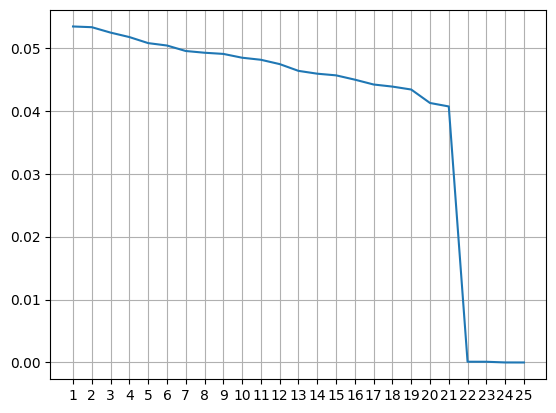

In [126]:
X=data1.drop(columns=col)
pca = PCA()
principal_components = pca.fit_transform(X)
variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(variance_ratio)
cumulative_variance_percentage = cumulative_variance * 100
sns.lineplot(x=np.linspace(1,25,25), y=variance_ratio)
plt.xticks(np.linspace(1,25,25),np.linspace(1,25,25).astype(int))
plt.grid(True)
cumulative_variance_percentage

In [127]:
pca=PCA(n_components=22)
data1_pca=pd.DataFrame(pca.fit_transform(X),columns=[f'x{i}' for i in range(1,23)])
for i in col:
    data1_pca[i]=data1[i]
data1_pca

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x17,x18,x19,x20,x21,x22,max1,min1,max2,min2
0,43.883986,468.863712,606.515614,-341.037616,-263.408023,468.838804,50.209301,130.634865,-563.778931,5.271934,...,407.965065,435.667727,-349.813858,265.852197,294.383593,-26.952533,8761.048455,8724.831598,17645.703943,17325.571800
1,-278.343281,-299.662474,-794.476403,-69.327937,123.002621,-385.370997,-505.396572,40.828481,-424.727383,-137.302628,...,145.039001,301.636586,-189.523944,382.457484,23.112070,-9.641175,30261.819111,27673.873145,58485.735757,57169.840233
2,175.646425,-152.244435,105.218177,-244.127644,209.749300,-383.255576,-688.603712,-347.769580,-133.879059,81.077009,...,86.804910,35.980352,256.406528,52.820998,-357.439521,-25.918802,5705.949563,5340.270545,11285.606444,10805.147664
3,202.091569,407.957295,-110.979530,-59.514494,-4.111383,305.305758,-498.981691,35.017570,-594.680601,52.703310,...,-292.838849,116.913225,261.659540,321.953710,-150.726940,0.443150,4935.107964,4670.055929,9940.021351,9287.187535
4,68.948492,82.800642,273.598567,-322.401903,19.282466,44.715518,-135.178874,-275.499857,513.253595,-554.663368,...,425.715886,10.718018,137.178390,-429.965157,255.428487,-4.694802,492.969310,477.546060,990.839622,948.770304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-91.589416,-138.240734,-337.147414,-234.956193,97.398736,566.198926,250.770858,-28.401005,-367.400251,584.055504,...,325.366832,-28.857258,361.816817,-154.529395,356.253918,6.984737,406.561256,390.708672,805.502554,787.732198
3996,-317.457857,-37.933862,-432.437518,559.850261,307.135676,638.685141,-124.247806,121.229333,-210.034979,-290.676223,...,-18.080553,-66.176910,127.649434,-322.499214,61.388791,-8.848049,4994.390641,4862.627123,10073.970746,9633.634253
3997,86.709312,-253.292486,-108.426530,-406.010444,-57.587396,244.742322,-149.963378,592.365624,-112.656017,441.429764,...,134.544344,41.350765,266.950850,-342.546277,322.924419,13.280692,1803.331343,1783.673945,3717.884642,3450.073022
3998,468.153403,-273.934911,-351.870430,329.436411,26.425726,-387.344813,-132.628373,-269.189454,488.189380,349.269582,...,144.695824,-456.047282,-6.817633,-14.867710,-230.124197,-2.854110,1689.320337,1673.902295,3391.765202,3334.637079


In [138]:
X=data1_pca.drop(columns=col).to_numpy()
max1=data1_pca['max1'].to_numpy()
min1=data1_pca['min1'].to_numpy()
max2=data1_pca['max2'].to_numpy()
min2=data1_pca['min2'].to_numpy()
x_max1_data1_train, x_max1_data1_test, max1_data1_train, max1_data1_test = tts(X,max1,test_size=0.2)
x_min1_data1_train, x_min1_data1_test, min1_data1_train, min1_data1_test = tts(X,min1,test_size=0.2)
x_max2_data1_train, x_max2_data1_test, max2_data1_train, max2_data1_test = tts(X,max2,test_size=0.2)
x_min2_data1_train, x_min2_data1_test, min2_data1_train, min2_data1_test = tts(X,min2,test_size=0.2)

### Normalising data1 & PCA with tts

In [124]:
data1_Normalise=data1.copy(deep=True)
colnew=col_ms+['length','alpha','beta','flux','ja']
for i in colnew:
    data1_Normalise[i] = (data1_Normalise[i] - data1_Normalise[i].min()) / (data1_Normalise[i].max() - data1_Normalise[i].min())
data1_Normalise

,length,alpha,beta,flux,ja,max1,min1,max2,min2,ms1,...,ms11,ms12,ms13,ms14,ms15,ms16,ms17,ms18,ms19,ms20
0,0.696017,0.015152,0.768500,0.331948,0.322052,8761.048455,8724.831598,17645.703943,17325.571800,0.566169,...,0.951049,0.260260,0.323734,0.450495,0.311311,0.896311,0.218127,0.965174,0.938693,0.885230
1,0.159093,0.506755,0.787131,0.762441,0.934530,30261.819111,27673.873145,58485.735757,57169.840233,0.539303,...,0.622378,0.970971,0.892751,0.523762,0.179179,0.064806,0.244024,0.912438,0.276382,0.568862
2,0.882291,0.001734,0.680122,0.282530,0.821525,5705.949563,5340.270545,11285.606444,10805.147664,0.238806,...,0.723277,0.691692,0.671301,0.974257,0.560561,0.497507,0.831673,0.386070,0.888442,0.758483
3,0.618912,0.220376,0.171746,0.016218,0.516209,4935.107964,4670.055929,9940.021351,9287.187535,0.402985,...,0.006993,0.084084,0.656405,0.778218,0.039039,0.765703,0.722112,0.839801,0.846231,0.934132
4,0.627949,0.572590,0.738128,0.508420,0.864977,492.969310,477.546060,990.839622,948.770304,0.469652,...,0.582418,0.834835,0.302880,0.491089,0.511512,0.657029,0.886454,0.114428,0.663317,0.336327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.963814,0.455405,0.288528,0.515693,0.046940,406.561256,390.708672,805.502554,787.732198,0.944279,...,0.365634,0.470470,0.214499,0.907921,0.220220,0.640080,0.446215,0.953234,0.151759,0.693613
3996,0.497090,0.103984,0.352511,0.557577,0.473794,4994.390641,4862.627123,10073.970746,9633.634253,0.514428,...,0.000000,0.155155,0.898709,0.336634,0.311311,0.982054,0.357570,0.362189,0.023116,0.394212
3997,0.395735,0.896286,0.548581,0.465529,0.170096,1803.331343,1783.673945,3717.884642,3450.073022,0.513433,...,0.507493,0.718719,0.280040,0.991089,0.009009,0.611167,0.248008,0.723383,0.429146,0.554890
3998,0.522135,0.024795,0.072353,0.658230,0.653256,1689.320337,1673.902295,3391.765202,3334.637079,0.316418,...,0.459540,0.678679,0.683217,0.964356,0.544545,0.105683,0.533865,0.106468,0.230151,0.021956


array([  4.54725145,   9.07228711,  13.49687322,  17.88939416,
        22.26351213,  26.52991115,  30.79158398,  35.0126105 ,
        39.21311386,  43.33779191,  47.41846025,  51.46472682,
        55.4613335 ,  59.42988489,  63.32681964,  67.21370648,
        71.03821257,  74.82484839,  78.57227463,  82.28248228,
        85.94946665,  89.59638054,  93.18714442,  96.60904843,
       100.        ])

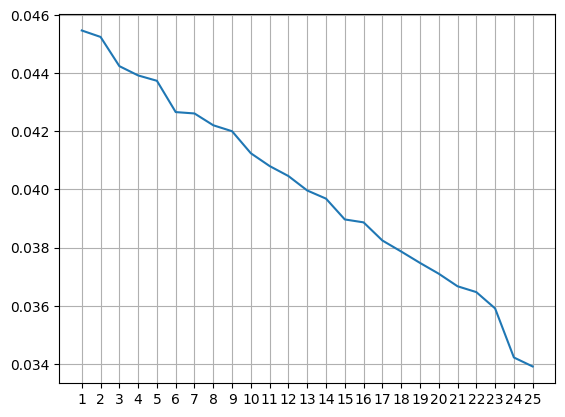

In [128]:
X=data1_Normalise.drop(columns=col)
pca = PCA()
principal_components = pca.fit_transform(X)
variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(variance_ratio)
cumulative_variance_percentage = cumulative_variance * 100

sns.lineplot(x=np.linspace(1,25,25), y=variance_ratio)
plt.xticks(np.linspace(1,25,25),np.linspace(1,25,25).astype(int))
plt.grid(True)
cumulative_variance_percentage

In [129]:
pca=PCA(n_components=15)
data1_Normalise_pca=pd.DataFrame(pca.fit_transform(X),columns=[f'x{i}' for i in range(1,16)])
for i in col:
    data1_Normalise_pca[i]=data1_Normalise[i]
data1_Normalise_pca

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,max1,min1,max2,min2
0,-0.275371,0.107112,-0.615493,-0.361935,-0.676620,0.511194,0.178396,0.013451,-0.141291,0.148657,0.404258,-0.099094,-0.245253,0.089667,0.237028,8761.048455,8724.831598,17645.703943,17325.571800
1,0.319695,0.277435,0.383881,0.643752,0.308696,0.097475,-0.378433,0.086060,0.318133,0.229996,0.212903,0.594645,0.239369,0.325271,-0.397948,30261.819111,27673.873145,58485.735757,57169.840233
2,0.206363,-0.144877,-0.177149,0.002962,-0.048871,0.182935,-0.498754,0.506740,0.304745,-0.399640,0.020458,0.052037,-0.087221,0.288298,0.585166,5705.949563,5340.270545,11285.606444,10805.147664
3,-0.257819,-0.328163,0.242573,0.076915,-0.400812,0.626554,-0.042530,0.437340,-0.283696,-0.103286,0.123444,-0.078591,-0.403245,0.587029,0.406840,4935.107964,4670.055929,9940.021351,9287.187535
4,-0.081783,0.088536,-0.488698,-0.026072,-0.074108,-0.011515,-0.028152,0.211726,0.266887,-0.160638,-0.493630,0.153068,-0.507181,-0.212711,0.135576,492.969310,477.546060,990.839622,948.770304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.237224,0.126692,-0.012385,0.345842,-0.225661,0.279385,0.384934,0.093463,-0.243596,-0.041241,0.589604,-0.349626,0.368824,0.179275,0.045466,406.561256,390.708672,805.502554,787.732198
3996,0.076701,0.268391,0.515820,0.187641,-0.122719,0.025723,0.787467,0.382036,0.111670,0.184771,0.014372,-0.020063,-0.386042,0.412643,-0.404085,4994.390641,4862.627123,10073.970746,9633.634253
3997,0.208267,-0.064147,-0.055575,0.106032,0.170123,0.163710,-0.168164,0.172433,-0.713952,0.407919,0.265044,-0.008280,0.055461,0.075608,-0.151867,1803.331343,1783.673945,3717.884642,3450.073022
3998,0.040777,-0.349293,-0.001200,0.345552,0.262135,-0.758950,-0.025177,-0.003092,0.246296,-0.255814,-0.012716,0.363142,0.684213,0.075659,-0.140058,1689.320337,1673.902295,3391.765202,3334.637079


In [139]:
X=data1_Normalise_pca.drop(columns=col).to_numpy()
max1=data1_Normalise_pca['max1'].to_numpy()
min1=data1_Normalise_pca['min1'].to_numpy()
max2=data1_Normalise_pca['max2'].to_numpy()
min2=data1_Normalise_pca['min2'].to_numpy()
x_max1_data1_Normalise_train_pca, x_max1_data1_Normalise_test_pca, max1_data1_Normalise_train_pca, max1_data1_Normalise_test_pca = tts(X,max1,test_size=0.2)
x_min1_data1_Normalise_train_pca, x_min1_data1_Normalise_test_pca, min1_data1_Normalise_train_pca, min1_data1_Normalise_test_pca = tts(X,min1,test_size=0.2)
x_max2_data1_Normalise_train_pca, x_max2_data1_Normalise_test_pca, max2_data1_Normalise_train_pca, max2_data1_Normalise_test_pca = tts(X,max2,test_size=0.2)
x_min2_data1_Normalise_train_pca, x_min2_data1_Normalise_test_pca, min2_data1_Normalise_train_pca, min2_data1_Normalise_test_pca = tts(X,min2,test_size=0.2)

In [163]:
X=data1_Normalise.drop(columns=col).to_numpy()
max1=data1_Normalise['max1'].to_numpy()
min1=data1_Normalise['min1'].to_numpy()
max2=data1_Normalise['max2'].to_numpy()
min2=data1_Normalise['min2'].to_numpy()
x_max1_data1_Normalise_train, x_max1_data1_Normalise_test, max1_data1_Normalise_train, max1_data1_Normalise_test = tts(X,max1,test_size=0.2)
x_min1_data1_Normalise_train, x_min1_data1_Normalise_test, min1_data1_Normalise_train, min1_data1_Normalise_test = tts(X,min1,test_size=0.2)
x_max2_data1_Normalise_train, x_max2_data1_Normalise_test, max2_data1_Normalise_train, max2_data1_Normalise_test = tts(X,max2,test_size=0.2)
x_min2_data1_Normalise_train, x_min2_data1_Normalise_test, min2_data1_Normalise_train, min2_data1_Normalise_test = tts(X,min2,test_size=0.2)

### Standardising data1 & PCA with tts

In [125]:
scaler = ss()
data1_Standerdize = data1.copy(deep=True)
data_to_scale = data1_Standerdize[colnew]
data_scaled = scaler.fit_transform(data_to_scale)
data1_Standerdize[colnew] = data_scaled
data1_Standerdize

,length,alpha,beta,flux,ja,max1,min1,max2,min2,ms1,...,ms11,ms12,ms13,ms14,ms15,ms16,ms17,ms18,ms19,ms20
0,0.683795,-1.679334,0.942212,-0.569556,-0.607651,8761.048455,8724.831598,17645.703943,17325.571800,0.213768,...,1.552795,-0.841342,-0.609405,-0.178568,-0.644332,1.362048,-0.986507,1.608183,1.529183,1.299825
1,-1.174887,0.036193,1.007171,0.915816,1.519251,30261.819111,27673.873145,58485.735757,57169.840233,0.121154,...,0.414076,1.623407,1.346545,0.075694,-1.106669,-1.505763,-0.895737,1.424351,-0.749911,0.210652
2,1.328622,-1.726160,0.634084,-0.740068,1.126827,5705.949563,5340.270545,11285.606444,10805.147664,-0.914748,...,0.763652,0.654865,0.585329,1.639061,0.227804,-0.013401,1.164054,-0.410505,1.356262,0.863469
3,0.416877,-0.963172,-1.138380,-1.658952,0.066582,4935.107964,4670.055929,9940.021351,9287.187535,-0.348775,...,-1.717994,-1.452322,0.534126,0.958738,-1.597027,0.911588,0.780025,1.171148,1.211009,1.468183
4,0.448161,0.265934,0.836320,0.039341,1.277720,492.969310,477.546060,990.839622,948.770304,-0.118956,...,0.275630,1.151286,-0.681089,-0.037693,0.056179,0.536778,1.356069,-1.357415,0.581578,-0.589908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1.610834,-0.143002,-0.731217,0.064434,-1.563011,406.561256,390.708672,805.502554,787.732198,1.517221,...,-0.475440,-0.112332,-0.984892,1.408851,-0.963064,0.478322,-0.187029,1.566561,-1.178754,0.640137
3996,-0.004836,-1.369340,-0.508140,0.208952,-0.080708,4994.390641,4862.627123,10073.970746,9633.634253,0.035401,...,-1.742222,-1.205847,1.367026,-0.573705,-0.644332,1.657770,-0.497743,-0.493750,-1.621430,-0.390627
3997,-0.355697,1.395524,0.175462,-0.108649,-1.135338,1803.331343,1783.673945,3717.884642,3450.073022,0.031971,...,0.016043,0.748595,-0.759600,1.697472,-1.702103,0.378602,-0.881772,0.765329,-0.224232,0.162550
3998,0.081862,-1.645683,-1.484914,0.556244,0.542494,1689.320337,1673.902295,3391.765202,3334.637079,-0.647197,...,-0.150092,0.609736,0.626291,1.604701,0.171764,-1.364780,0.120194,-1.385163,-0.908998,-1.672209


array([  4.54428586,   9.04937784,  13.47341978,  17.8602159 ,
        22.21349412,  26.49446855,  30.76499931,  35.00146066,
        39.20310802,  43.33449283,  47.40481856,  51.43721906,
        55.41779652,  59.3852791 ,  63.29844051,  67.18287226,
        71.01501483,  74.79435909,  78.55264984,  82.26584065,
        85.92537628,  89.55465039,  93.14346799,  96.58881703,
       100.        ])

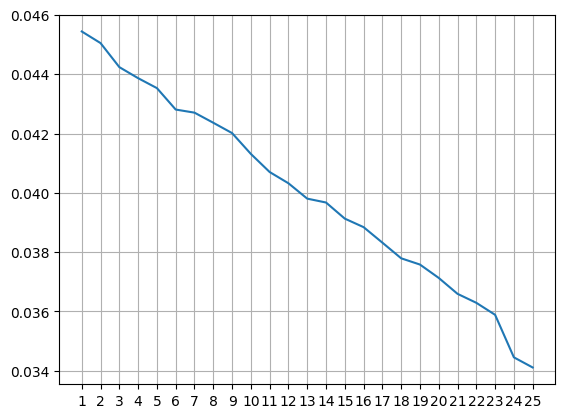

In [130]:
X=data1_Standerdize.drop(columns=col)
pca = PCA()
principal_components = pca.fit_transform(X)
variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(variance_ratio)
cumulative_variance_percentage = cumulative_variance * 100

sns.lineplot(x=np.linspace(1,25,25), y=variance_ratio)
plt.xticks(np.linspace(1,25,25),np.linspace(1,25,25).astype(int))
plt.grid(True)
cumulative_variance_percentage

In [131]:
pca=PCA(n_components=18)
data1_Standerdize_pca=pd.DataFrame(pca.fit_transform(X),columns=[f'x{i}' for i in range(1,19)])
for i in col:
    data1_Standerdize_pca[i]=data1_Standerdize[i]
data1_Standerdize_pca

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x13,x14,x15,x16,x17,x18,max1,min1,max2,min2
0,0.685090,-0.306338,-2.084130,2.163399,-2.015022,0.143881,1.308822,-1.071167,0.207439,0.635064,...,-0.144222,0.982082,-0.217061,-0.740470,1.795411,0.099292,8761.048455,8724.831598,17645.703943,17325.571800
1,0.094315,1.373096,1.137574,-2.356381,0.943461,-1.449038,0.587287,0.190445,-0.709125,1.151502,...,-1.430985,-0.728337,-0.183310,1.650930,1.481834,0.972680,30261.819111,27673.873145,58485.735757,57169.840233
2,-0.826174,0.295838,-0.725549,0.143759,0.040878,-1.719432,0.777881,1.460104,-1.246321,-1.144189,...,-1.087502,0.735476,-0.528161,-2.010684,0.097202,-0.603361,5705.949563,5340.270545,11285.606444,10805.147664
3,-0.156133,-1.634797,0.371086,0.144200,-1.513622,-0.915684,2.598326,0.485920,0.570173,-0.243412,...,-1.626527,2.070271,-0.096111,-0.924896,-0.405863,0.662195,4935.107964,4670.055929,9940.021351,9287.187535
4,0.120405,0.136842,-1.754546,0.480406,0.266842,0.092428,0.339572,0.611072,-1.207784,-0.598285,...,1.437300,1.072759,0.111930,-0.495950,-1.200797,-0.291661,492.969310,477.546060,990.839622,948.770304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-0.151367,0.819372,-0.069797,-0.741846,-1.044649,0.907413,1.619914,-0.115127,0.828965,0.265241,...,-0.567595,-0.655132,0.776159,-0.258146,-1.006201,-0.028689,406.561256,390.708672,805.502554,787.732198
3996,0.693763,0.527930,1.520631,-0.508132,-0.682949,2.422009,1.506384,0.724907,-0.599298,0.643970,...,-1.231337,1.883034,-0.365341,1.680321,-0.156660,-0.400308,4994.390641,4862.627123,10073.970746,9633.634253
3997,-0.655582,0.417770,0.122300,0.188195,0.397977,-0.769785,0.979281,0.521215,2.579457,1.586544,...,0.005040,0.066738,-0.324918,0.628188,-1.758636,-0.266207,1803.331343,1783.673945,3717.884642,3450.073022
3998,-1.054221,-0.573111,-0.290464,-1.891408,0.842496,0.796484,-2.009335,1.070515,-0.432673,-0.614424,...,-1.174467,-2.191915,-0.485851,0.222479,0.737256,-0.492737,1689.320337,1673.902295,3391.765202,3334.637079


In [140]:
X=data1_Standerdize_pca.drop(columns=col).to_numpy()
max1=data1_Standerdize_pca['max1'].to_numpy()
min1=data1_Standerdize_pca['min1'].to_numpy()
max2=data1_Standerdize_pca['max2'].to_numpy()
min2=data1_Standerdize_pca['min2'].to_numpy()
x_max1_data1_Standerdize_train_pca, x_max1_data1_Standerdize_test_pca, max1_data1_Standerdize_train_pca, max1_data1_Standerdize_test_pca = tts(X,max1,test_size=0.2)
x_min1_data1_Standerdize_train_pca, x_min1_data1_Standerdize_test_pca, min1_data1_Standerdize_train_pca, min1_data1_Standerdize_test_pca = tts(X,min1,test_size=0.2)
x_max2_data1_Standerdize_train_pca, x_max2_data1_Standerdize_test_pca, max2_data1_Standerdize_train_pca, max2_data1_Standerdize_test_pca = tts(X,max2,test_size=0.2)
x_min2_data1_Standerdize_train_pca, x_min2_data1_Standerdize_test_pca, min2_data1_Standerdize_train_pca, min2_data1_Standerdize_test_pca = tts(X,min2,test_size=0.2)

In [161]:
X=data1_Standerdize.drop(columns=col).to_numpy()
max1=data1_Standerdize['max1'].to_numpy()
min1=data1_Standerdize['min1'].to_numpy()
max2=data1_Standerdize['max2'].to_numpy()
min2=data1_Standerdize['min2'].to_numpy()
x_max1_data1_Standerdize_train, x_max1_data1_Standerdize_test, max1_data1_Standerdize_train, max1_data1_Standerdize_test = tts(X,max1,test_size=0.2)
x_min1_data1_Standerdize_train, x_min1_data1_Standerdize_test, min1_data1_Standerdize_train, min1_data1_Standerdize_test = tts(X,min1,test_size=0.2)
x_max2_data1_Standerdize_train, x_max2_data1_Standerdize_test, max2_data1_Standerdize_train, max2_data1_Standerdize_test = tts(X,max2,test_size=0.2)
x_min2_data1_Standerdize_train, x_min2_data1_Standerdize_test, min2_data1_Standerdize_train, min2_data1_Standerdize_test = tts(X,min2,test_size=0.2)

## data2

### Creating data2

In [5]:
data2 = data.copy(deep=True)
col_ms = [f"ms{i}" for i in range(1, 201)]
data2 = data2.drop(columns=col_ms)


for i in range(1, 21):
    data2["ms" + f"{i}"] = ""


for k in range(len(data)):
    temp = 0
    for i in range(1, 21):
        string_temp = ""
        for j in range(1, 11):
            string_temp += data[f"ms{temp+j}"][k].astype("str")
        data2[f"ms{i}"][k] = string_temp
        temp = temp + 10

data2

C:\Users\shriv\AppData\Local\Temp\ipykernel_16972\2009285495.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[f"ms{i}"][k] = string_temp


,length,alpha,beta,flux,ja,max1,min1,max2,min2,ms1,...,ms11,ms12,ms13,ms14,ms15,ms16,ms17,ms18,ms19,ms20
0,0.069902,0.812113,38.438948,-1.681073,323.685434,8761.048455,8724.831598,17645.703943,17325.571800,1001000000,...,1111001110,0100001001,0101001001,0111001010,0101000011,1110010101,0011011110,1111011010,1111000010,1110001100
1,0.016766,25.363305,39.369244,2.620376,934.456130,30261.819111,27673.873145,58485.735757,57169.840233,1000100101,...,1001111010,1111100010,1110010010,1000010100,0010111010,0001000010,0011111000,1110100100,0100011010,1001000100
2,0.088336,0.141976,34.026161,-2.174854,821.765815,5705.949563,5340.270545,11285.606444,10805.147664,0011110011,...,1011100011,1011000011,1010101101,1111100101,1001000010,0111111110,1101001110,0110001100,1110001111,1100001100
3,0.062271,11.061218,8.642271,-4.835824,517.301044,4935.107964,4670.055929,9940.021351,9287.187535,0110011010,...,0000000111,0001010101,1010011101,1100011010,0000101000,1100001111,1011011111,1101011010,1101100101,1110111101
4,0.063165,28.651174,36.922439,0.082215,865.096945,492.969310,477.546060,990.839622,948.770304,0111011101,...,1001010001,1101010100,0100110100,0111110011,1000001111,1010100000,1110000111,0001110101,1010101000,0101011000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.096404,22.798822,14.473361,0.154883,49.339827,406.561256,390.708672,805.502554,787.732198,1111000111,...,0101110011,0111100000,0011011010,1110100010,0011100100,1010001111,0111000110,1111001110,0010011000,1011001001
3996,0.050215,5.248490,17.668096,0.573389,475.004608,4994.390641,4862.627123,10073.970746,9633.634253,1000001100,...,0000000000,0010011110,1110011000,0101010110,0101000011,1111101100,0101101100,0101110100,0000010111,0110010011
3997,0.040185,44.816921,27.458135,-0.346343,172.152538,1803.331343,1783.673945,3717.884642,3450.073022,1000001011,...,1000000100,1011011111,0100011101,1111110110,0000001001,1001110010,0011111100,1011100010,0110111000,1000110110
3998,0.052694,1.293693,3.679471,1.579100,653.966227,1689.320337,1673.902295,3391.765202,3334.637079,0101000011,...,0111010011,1010110110,1010111010,1111011011,1000110001,0001101100,1000011111,0001101101,0011101010,0000010110


In [11]:
def bin_to_dec(x):
    x=[int(i,base=2) for i in x]
    return x

col_bin=[f'ms{i}' for i in range(1,21)]
for i in col_bin:
    data2[i]=bin_to_dec(data2[i].to_numpy())

data2

,length,alpha,beta,flux,ja,max1,min1,max2,min2,ms1,...,ms11,ms12,ms13,ms14,ms15,ms16,ms17,ms18,ms19,ms20
0,0.069902,0.812113,38.438948,-1.681073,323.685434,8761.048455,8724.831598,17645.703943,17325.571800,576,...,974,265,329,458,323,917,222,986,962,908
1,0.016766,25.363305,39.369244,2.620376,934.456130,30261.819111,27673.873145,58485.735757,57169.840233,549,...,634,994,914,532,186,66,248,932,282,580
2,0.088336,0.141976,34.026161,-2.174854,821.765815,5705.949563,5340.270545,11285.606444,10805.147664,243,...,739,707,685,997,578,510,846,396,911,780
3,0.062271,11.061218,8.642271,-4.835824,517.301044,4935.107964,4670.055929,9940.021351,9287.187535,410,...,7,85,669,794,40,783,735,858,869,957
4,0.063165,28.651174,36.922439,0.082215,865.096945,492.969310,477.546060,990.839622,948.770304,477,...,593,852,308,499,527,672,903,117,680,344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.096404,22.798822,14.473361,0.154883,49.339827,406.561256,390.708672,805.502554,787.732198,967,...,371,480,218,930,228,655,454,974,152,713
3996,0.050215,5.248490,17.668096,0.573389,475.004608,4994.390641,4862.627123,10073.970746,9633.634253,524,...,0,158,920,342,323,1004,364,372,23,403
3997,0.040185,44.816921,27.458135,-0.346343,172.152538,1803.331343,1783.673945,3717.884642,3450.073022,523,...,516,735,285,1014,9,626,252,738,440,566
3998,0.052694,1.293693,3.679471,1.579100,653.966227,1689.320337,1673.902295,3391.765202,3334.637079,323,...,467,694,698,987,561,108,543,109,234,22


### PCA on data2

array([  5.37540368,  10.71068674,  15.95014144,  21.11836875,
        26.19366351,  31.22735128,  36.1687167 ,  41.09616358,
        45.99710471,  50.80038823,  55.58880797,  60.34317628,
        64.97793883,  69.58828317,  74.16606956,  78.66131584,
        83.07223212,  87.47081535,  91.80909267,  95.95287118,
        99.97722126,  99.98854017,  99.99954338,  99.99999996,
       100.        ])

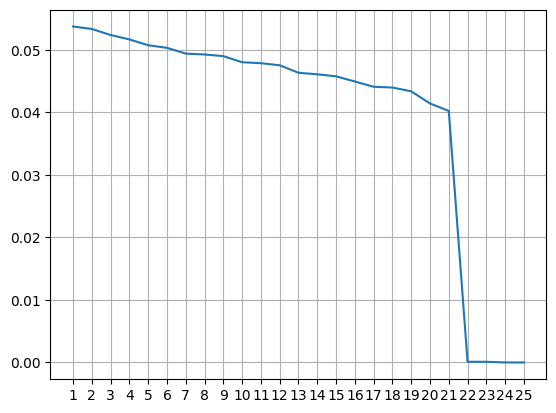

In [15]:
col=['max1','min1','max2','min2']
X=data2.drop(columns=col)
pca = PCA()
principal_components = pca.fit_transform(X)
variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(variance_ratio)
cumulative_variance_percentage = cumulative_variance * 100
sns.lineplot(x=np.linspace(1,25,25), y=variance_ratio)
plt.xticks(np.linspace(1,25,25),np.linspace(1,25,25).astype(int))
plt.grid(True)
cumulative_variance_percentage

In [ ]:
pca=PCA(n_components=22)
data1_pca=pd.DataFrame(pca.fit_transform(X),columns=[f'x{i}' for i in range(1,23)])
for i in col:
    data1_pca[i]=data1[i]
data1_pca

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x17,x18,x19,x20,x21,x22,max1,min1,max2,min2
0,43.883986,468.863712,606.515614,-341.037616,-263.408023,468.838804,50.209301,130.634865,-563.778931,5.271934,...,407.965065,435.667727,-349.813858,265.852197,294.383593,-26.952533,8761.048455,8724.831598,17645.703943,17325.571800
1,-278.343281,-299.662474,-794.476403,-69.327937,123.002621,-385.370997,-505.396572,40.828481,-424.727383,-137.302628,...,145.039001,301.636586,-189.523944,382.457484,23.112070,-9.641175,30261.819111,27673.873145,58485.735757,57169.840233
2,175.646425,-152.244435,105.218177,-244.127644,209.749300,-383.255576,-688.603712,-347.769580,-133.879059,81.077009,...,86.804910,35.980352,256.406528,52.820998,-357.439521,-25.918802,5705.949563,5340.270545,11285.606444,10805.147664
3,202.091569,407.957295,-110.979530,-59.514494,-4.111383,305.305758,-498.981691,35.017570,-594.680601,52.703310,...,-292.838849,116.913225,261.659540,321.953710,-150.726940,0.443150,4935.107964,4670.055929,9940.021351,9287.187535
4,68.948492,82.800642,273.598567,-322.401903,19.282466,44.715518,-135.178874,-275.499857,513.253595,-554.663368,...,425.715886,10.718018,137.178390,-429.965157,255.428487,-4.694802,492.969310,477.546060,990.839622,948.770304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-91.589416,-138.240734,-337.147414,-234.956193,97.398736,566.198926,250.770858,-28.401005,-367.400251,584.055504,...,325.366832,-28.857258,361.816817,-154.529395,356.253918,6.984737,406.561256,390.708672,805.502554,787.732198
3996,-317.457857,-37.933862,-432.437518,559.850261,307.135676,638.685141,-124.247806,121.229333,-210.034979,-290.676223,...,-18.080553,-66.176910,127.649434,-322.499214,61.388791,-8.848049,4994.390641,4862.627123,10073.970746,9633.634253
3997,86.709312,-253.292486,-108.426530,-406.010444,-57.587396,244.742322,-149.963378,592.365624,-112.656017,441.429764,...,134.544344,41.350765,266.950850,-342.546277,322.924419,13.280692,1803.331343,1783.673945,3717.884642,3450.073022
3998,468.153403,-273.934911,-351.870430,329.436411,26.425726,-387.344813,-132.628373,-269.189454,488.189380,349.269582,...,144.695824,-456.047282,-6.817633,-14.867710,-230.124197,-2.854110,1689.320337,1673.902295,3391.765202,3334.637079


In [ ]:
X=data1_pca.drop(columns=col).to_numpy()
max1=data1_pca['max1'].to_numpy()
min1=data1_pca['min1'].to_numpy()
max2=data1_pca['max2'].to_numpy()
min2=data1_pca['min2'].to_numpy()
x_max1_data1_train, x_max1_data1_test, max1_data1_train, max1_data1_test = tts(X,max1,test_size=0.2)
x_min1_data1_train, x_min1_data1_test, min1_data1_train, min1_data1_test = tts(X,min1,test_size=0.2)
x_max2_data1_train, x_max2_data1_test, max2_data1_train, max2_data1_test = tts(X,max2,test_size=0.2)
x_min2_data1_train, x_min2_data1_test, min2_data1_train, min2_data1_test = tts(X,min2,test_size=0.2)

### Normalising data2

In [12]:
data2_Normalise=data2.copy(deep=True)
colnew=['length','alpha','beta','flux','ja']
for i in colnew:
    data2_Normalise[i] = (data2_Normalise[i] - data2_Normalise[i].min()) / (data2_Normalise[i].max() - data2_Normalise[i].min())
data2_Normalise

,length,alpha,beta,flux,ja,max1,min1,max2,min2,ms1,...,ms11,ms12,ms13,ms14,ms15,ms16,ms17,ms18,ms19,ms20
0,0.696017,0.015152,0.768500,0.331948,0.322052,8761.048455,8724.831598,17645.703943,17325.571800,576,...,974,265,329,458,323,917,222,986,962,908
1,0.159093,0.506755,0.787131,0.762441,0.934530,30261.819111,27673.873145,58485.735757,57169.840233,549,...,634,994,914,532,186,66,248,932,282,580
2,0.882291,0.001734,0.680122,0.282530,0.821525,5705.949563,5340.270545,11285.606444,10805.147664,243,...,739,707,685,997,578,510,846,396,911,780
3,0.618912,0.220376,0.171746,0.016218,0.516209,4935.107964,4670.055929,9940.021351,9287.187535,410,...,7,85,669,794,40,783,735,858,869,957
4,0.627949,0.572590,0.738128,0.508420,0.864977,492.969310,477.546060,990.839622,948.770304,477,...,593,852,308,499,527,672,903,117,680,344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.963814,0.455405,0.288528,0.515693,0.046940,406.561256,390.708672,805.502554,787.732198,967,...,371,480,218,930,228,655,454,974,152,713
3996,0.497090,0.103984,0.352511,0.557577,0.473794,4994.390641,4862.627123,10073.970746,9633.634253,524,...,0,158,920,342,323,1004,364,372,23,403
3997,0.395735,0.896286,0.548581,0.465529,0.170096,1803.331343,1783.673945,3717.884642,3450.073022,523,...,516,735,285,1014,9,626,252,738,440,566
3998,0.522135,0.024795,0.072353,0.658230,0.653256,1689.320337,1673.902295,3391.765202,3334.637079,323,...,467,694,698,987,561,108,543,109,234,22


array([  5.62969215,  11.21631835,  16.7007115 ,  22.11295717,
        27.42080349,  32.66886776,  37.84034573,  42.99748173,
        48.11521384,  53.1466761 ,  58.13407728,  62.98944876,
        67.82583092,  72.64105618,  77.4294024 ,  82.07219782,
        86.68870583,  91.2499642 ,  95.65937828,  99.99997635,
        99.99998121,  99.99998606,  99.99999079,  99.99999544,
       100.        ])

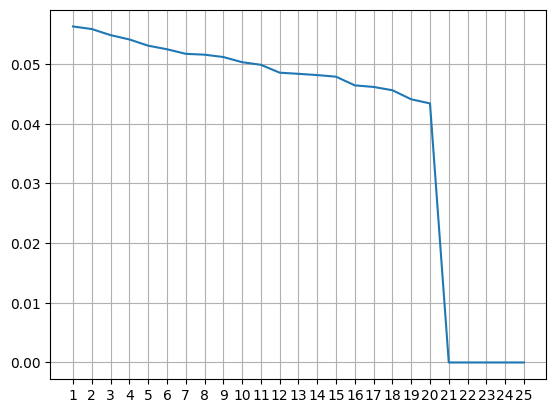

In [16]:
X=data2_Normalise.drop(columns=col)
pca = PCA()
principal_components = pca.fit_transform(X)
variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(variance_ratio)
cumulative_variance_percentage = cumulative_variance * 100

sns.lineplot(x=np.linspace(1,25,25), y=variance_ratio)
plt.xticks(np.linspace(1,25,25),np.linspace(1,25,25).astype(int))
plt.grid(True)
cumulative_variance_percentage

In [18]:
X=data2_Normalise.drop(columns=col).to_numpy()
max1=data2_Normalise['max1'].to_numpy()
min1=data2_Normalise['min1'].to_numpy()
max2=data2_Normalise['max2'].to_numpy()
min2=data2_Normalise['min2'].to_numpy()
x_max1_data2_Normalise_train, x_max1_data2_Normalise_test, max1_data2_Normalise_train, max1_data2_Normalise_test = tts(X,max1,test_size=0.2)
x_min1_data2_Normalise_train, x_min1_data2_Normalise_test, min1_data2_Normalise_train, min1_data2_Normalise_test = tts(X,min1,test_size=0.2)
x_max2_data2_Normalise_train, x_max2_data2_Normalise_test, max2_data2_Normalise_train, max2_data2_Normalise_test = tts(X,max2,test_size=0.2)
x_min2_data2_Normalise_train, x_min2_data2_Normalise_test, min2_data2_Normalise_train, min2_data2_Normalise_test = tts(X,min2,test_size=0.2)

### Standardising data2

In [13]:
scaler = ss()
data2_Standerdize = data2.copy(deep=True)
data_to_scale = data2_Standerdize[colnew]
data_scaled = scaler.fit_transform(data_to_scale)
data2_Standerdize[colnew] = data_scaled
data2_Standerdize

,length,alpha,beta,flux,ja,max1,min1,max2,min2,ms1,...,ms11,ms12,ms13,ms14,ms15,ms16,ms17,ms18,ms19,ms20
0,0.683795,-1.679334,0.942212,-0.569556,-0.607651,8761.048455,8724.831598,17645.703943,17325.571800,576,...,974,265,329,458,323,917,222,986,962,908
1,-1.174887,0.036193,1.007171,0.915816,1.519251,30261.819111,27673.873145,58485.735757,57169.840233,549,...,634,994,914,532,186,66,248,932,282,580
2,1.328622,-1.726160,0.634084,-0.740068,1.126827,5705.949563,5340.270545,11285.606444,10805.147664,243,...,739,707,685,997,578,510,846,396,911,780
3,0.416877,-0.963172,-1.138380,-1.658952,0.066582,4935.107964,4670.055929,9940.021351,9287.187535,410,...,7,85,669,794,40,783,735,858,869,957
4,0.448161,0.265934,0.836320,0.039341,1.277720,492.969310,477.546060,990.839622,948.770304,477,...,593,852,308,499,527,672,903,117,680,344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1.610834,-0.143002,-0.731217,0.064434,-1.563011,406.561256,390.708672,805.502554,787.732198,967,...,371,480,218,930,228,655,454,974,152,713
3996,-0.004836,-1.369340,-0.508140,0.208952,-0.080708,4994.390641,4862.627123,10073.970746,9633.634253,524,...,0,158,920,342,323,1004,364,372,23,403
3997,-0.355697,1.395524,0.175462,-0.108649,-1.135338,1803.331343,1783.673945,3717.884642,3450.073022,523,...,516,735,285,1014,9,626,252,738,440,566
3998,0.081862,-1.645683,-1.484914,0.556244,0.542494,1689.320337,1673.902295,3391.765202,3334.637079,323,...,467,694,698,987,561,108,543,109,234,22


array([  5.62967742,  11.21628898,  16.70066772,  22.11289922,
        27.42073161,  32.66878219,  37.84024662,  42.99736916,
        48.11508787,  53.14653696,  58.13392507,  62.98928382,
        67.82565342,  72.64086614,  77.42919986,  82.07198312,
        86.688479  ,  91.24972545,  95.65912817,  99.99971491,
        99.99977348,  99.99983169,  99.99988876,  99.99994497,
       100.        ])

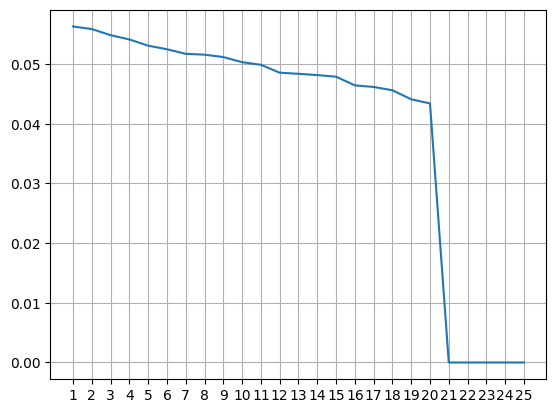

In [17]:
X=data2_Standerdize.drop(columns=col)
pca = PCA()
principal_components = pca.fit_transform(X)
variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(variance_ratio)
cumulative_variance_percentage = cumulative_variance * 100

sns.lineplot(x=np.linspace(1,25,25), y=variance_ratio)
plt.xticks(np.linspace(1,25,25),np.linspace(1,25,25).astype(int))
plt.grid(True)
cumulative_variance_percentage

In [20]:
X=data2_Standerdize.drop(columns=col).to_numpy()
max1=data2_Standerdize['max1'].to_numpy()
min1=data2_Standerdize['min1'].to_numpy()
max2=data2_Standerdize['max2'].to_numpy()
min2=data2_Standerdize['min2'].to_numpy()
x_max1_data2_Standerdize_train, x_max1_data2_Standerdize_test, max1_data2_Standerdize_train, max1_data2_Standerdize_test = tts(X,max1,test_size=0.2)
x_min1_data2_Standerdize_train, x_min1_data2_Standerdize_test, min1_data2_Standerdize_train, min1_data2_Standerdize_test = tts(X,min1,test_size=0.2)
x_max2_data2_Standerdize_train, x_max2_data2_Standerdize_test, max2_data2_Standerdize_train, max2_data2_Standerdize_test = tts(X,max2,test_size=0.2)
x_min2_data2_Standerdize_train, x_min2_data2_Standerdize_test, min2_data2_Standerdize_train, min2_data2_Standerdize_test = tts(X,min2,test_size=0.2)

# MODEL TRAINING

## Random Forest Regressor

### max1

In [19]:
rfr_max1_data2_Normalise = rfr()
rfr_max1_data2_Normalise.fit(x_max1_data2_Normalise_train,max1_data2_Normalise_train)
rfr_max1_data2_Normalise.score(x_max1_data2_Normalise_test,max1_data2_Normalise_test)

0.6051545201113548

In [21]:
rfr_max1_data2_Standerdize = rfr()
rfr_max1_data2_Standerdize.fit(x_max1_data2_Standerdize_train,max1_data2_Standerdize_train)
rfr_max1_data2_Standerdize.score(x_max1_data2_Standerdize_test,max1_data2_Standerdize_test)

0.6238988654803634

#### Original data after PCA

In [154]:
rfr_max1_data = rfr()
rfr_max1_data.fit(x_max1_data_train,max1_data_train)
rfr_max1_data.score(x_max1_data_test,max1_data_test)

-0.028886512386595342

#### Normalised data after PCA

In [155]:
rfr_max1_data_Normalise = rfr()
rfr_max1_data_Normalise.fit(x_max1_data_Normalise_train,max1_data_Normalise_train)
rfr_max1_data_Normalise.score(x_max1_data_Normalise_test,max1_data_Normalise_test)

-0.8865986984012189

#### data1 after PCA

In [156]:
rfr_max1_data1 = rfr()
rfr_max1_data1.fit(x_max1_data1_train,max1_data1_train)
rfr_max1_data1.score(x_max1_data1_test,max1_data1_test)

-0.012975148373031375

#### Normalised data1 after PCA

In [157]:
rfr_max1_data1_Normalise_pca = rfr()
rfr_max1_data1_Normalise_pca.fit(x_max1_data1_Normalise_train_pca,max1_data1_Normalise_train_pca)
rfr_max1_data1_Normalise_pca.score(x_max1_data1_Normalise_test_pca,max1_data1_Normalise_test_pca)

0.06968629903849588

#### Standardised data1 after PCA

In [158]:
rfr_max1_data1_Standerdize_pca = rfr()
rfr_max1_data1_Standerdize_pca.fit(x_max1_data1_Standerdize_train_pca,max1_data1_Standerdize_train_pca)
rfr_max1_data1_Standerdize_pca.score(x_max1_data1_Standerdize_test_pca,max1_data1_Standerdize_test_pca)

0.11343880981126497

In [160]:
for i in [200,400,600,1000,2000]:
    rfr_max1_data1_Standerdize_pca = rfr(n_estimators=i)
    rfr_max1_data1_Standerdize_pca.fit(x_max1_data1_Standerdize_train_pca,max1_data1_Standerdize_train_pca)
    print(i,":",rfr_max1_data1_Standerdize_pca.score(x_max1_data1_Standerdize_test_pca,max1_data1_Standerdize_test_pca))

200 : 0.13326131543281383
400 : 0.1302590404063223
600 : 0.1366212881767307
1000 : 0.12965001765832085
2000 : 0.13626809748914714


#### Standardised data1 without PCA

In [165]:
rfr_max1_data1_Standerdize = rfr()
rfr_max1_data1_Standerdize.fit(x_max1_data1_Standerdize_train,max1_data1_Standerdize_train)
rfr_max1_data1_Standerdize.score(x_max1_data1_Standerdize_test,max1_data1_Standerdize_test)

0.47896219418860186

In [174]:
params={"n_estimators":[100,200,400,600,1000,2000],'max_features':['sqrt','log2',1,2,4],'bootstrap':[True,False]}
tuner=gscv(estimator=rfr_max1_data1_Standerdize,param_grid=params)
tuner.fit(x_max1_data1_Standerdize_train,max1_data1_Standerdize_train)
#print(i,":",rfr_max1_data1_Standerdize.score(x_max1_data1_Standerdize_test,max1_data1_Standerdize_test))
tuner.best_estimator_

RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=2000)

In [175]:
tuner.best_score_

0.5825515665349229

#### Normalised data1 without PCA

In [164]:
rfr_max1_data1_Normalise = rfr()
rfr_max1_data1_Normalise.fit(x_max1_data1_Normalise_train,max1_data1_Normalise_train)
rfr_max1_data1_Normalise.score(x_max1_data1_Normalise_test,max1_data1_Normalise_test)

0.6508142776192558

In [168]:
params={"n_estimators":[100,200,400,600,1000,2000],'max_features':['sqrt','log2',1,2,4],'bootstrap':[True,False]}
tuner=gscv(estimator=rfr_max1_data1_Normalise,param_grid=params)
tuner.fit(x_max1_data1_Normalise_train,max1_data1_Normalise_train)
tuner.cv_results_

{'mean_fit_time': array([  2.74739766,   5.36824236,  10.71084733,  15.86013484,
         26.76106644,  54.00852256,   2.29876394,   4.5054493 ,
          8.9047287 ,  13.33315687,  51.67652102, 111.5154223 ,
          2.16528974,   4.17237773,   8.31367731,  12.67479258,
         20.96787772,  29.22289863,   1.20147734,   2.42311273,
          4.82890463,   7.30814333,  12.42305565,  24.00460887,
          2.02933455,   5.46794877,  22.26373606,  33.2946712 ,
         56.34856253, 113.04424648,   6.28889213,  12.59768901,
         25.35874219,  38.18845015,  62.35455141,  98.18298712,
          3.6219161 ,   7.24388947,  14.63858914,  21.87641439,
         36.60071917,  74.20650663,   1.4187767 ,   2.67385511,
          3.16723905,   4.70075397,   8.07210283,  19.920011  ,
          2.17419605,   4.42251015,   8.84575944,  13.26094422,
         15.22135949,  16.25887914,   1.17355781,   2.37983575,
          4.73800259,   7.07003493,  11.87996702,  26.46382017]),
 'std_fit_time': arra

In [171]:
tuner.best_params_,tuner.best_score_,tuner.best_estimator_

({'bootstrap': False, 'max_features': 'sqrt', 'n_estimators': 1000},
 0.6348432003055222,
 RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=1000))

In [172]:
rfr_max1_data1_Normalise=tuner.best_estimator_
rfr_max1_data1_Normalise.fit(x_max1_data1_Normalise_train,max1_data1_Normalise_train)
rfr_max1_data1_Normalise.score(x_max1_data1_Normalise_test,max1_data1_Normalise_test)

0.6566885206488631

In [184]:
rfr_max1_data1_Normalise.feature_importances_[:6], rfr_max1_data1_Normalise.feature_importances_[6:].sum(), data1_Normalise.columns

(array([0.42919451, 0.07672714, 0.04122303, 0.05518538, 0.01650983,
        0.01744511]),
 0.3637150112689436,
 Index(['length', 'alpha', 'beta', 'flux', 'ja', 'max1', 'min1', 'max2', 'min2',
        'ms1', 'ms2', 'ms3', 'ms4', 'ms5', 'ms6', 'ms7', 'ms8', 'ms9', 'ms10',
        'ms11', 'ms12', 'ms13', 'ms14', 'ms15', 'ms16', 'ms17', 'ms18', 'ms19',
        'ms20'],
       dtype='object'))

### min1

#### Normalised data1 without PCA

In [185]:
rfr_min1_data1_Normalise = rfr()
rfr_min1_data1_Normalise.fit(x_min1_data1_Normalise_train,min1_data1_Normalise_train)
rfr_min1_data1_Normalise.score(x_min1_data1_Normalise_test,min1_data1_Normalise_test)

0.5566310697185831

In [189]:
params={"n_estimators":[100,200,400,600,1000,2000],'max_features':['sqrt','log2',1,2,4],'bootstrap':[True,False]}
tuner=gscv(estimator=rfr_min1_data1_Normalise,param_grid=params)
tuner.fit(x_min1_data1_Normalise_train,min1_data1_Normalise_train)
tuner.best_score_,tuner.best_estimator_

(0.6431264159234162,
 RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=2000))

In [190]:
rfr_min1_data1_Normalise=tuner.best_estimator_
rfr_min1_data1_Normalise.fit(x_min1_data1_Normalise_train,min1_data1_Normalise_train)
rfr_min1_data1_Normalise.score(x_min1_data1_Normalise_test,min1_data1_Normalise_test)

0.6278409018475389

#### Standardised data1 without PCA

In [199]:
rfr_min1_data1_Standerdize = rfr()
rfr_min1_data1_Standerdize.fit(x_min1_data1_Standerdize_train,min1_data1_Standerdize_train)
rfr_min1_data1_Standerdize.score(x_min1_data1_Standerdize_test,min1_data1_Standerdize_test)

0.6720634624601385

In [192]:
params={"n_estimators":[100,200,400,600,1000,2000],'max_features':['sqrt','log2',1,2,4],'bootstrap':[True,False]}
tuner=gscv(estimator=rfr_min1_data1_Standerdize,param_grid=params)
tuner.fit(x_min1_data1_Standerdize_train,min1_data1_Standerdize_train)
tuner.best_score_,tuner.best_estimator_

(0.6192167284911034,
 RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=600))

In [193]:
rfr_min1_data1_Standerdize=tuner.best_estimator_
rfr_min1_data1_Standerdize.fit(x_min1_data1_Standerdize_train,min1_data1_Standerdize_train)
rfr_min1_data1_Standerdize.score(x_min1_data1_Standerdize_test,min1_data1_Standerdize_test)

0.6398872498291173

### max2

#### Normalised data1 without PCA

In [195]:
rfr_max2_data1_Normalise = rfr()
rfr_max2_data1_Normalise.fit(x_max2_data1_Normalise_train,max2_data1_Normalise_train)
rfr_max2_data1_Normalise.score(x_max2_data1_Normalise_test,max2_data1_Normalise_test)

0.5212996168003841

In [200]:
params={"n_estimators":[100,200,400,600,1000,2000],'max_features':['sqrt','log2',1,2,4],'bootstrap':[True,False]}
tuner=gscv(estimator=rfr_max2_data1_Normalise,param_grid=params)
tuner.fit(x_max2_data1_Normalise_train,max2_data1_Normalise_train)
tuner.best_score_,tuner.best_estimator_

KeyboardInterrupt: 

In [ ]:
rfr_max2_data1_Normalise=tuner.best_estimator_
rfr_max2_data1_Normalise.fit(x_max2_data1_Normalise_train,max2_data1_Normalise_train)
rfr_max2_data1_Normalise.score(x_max2_data1_Normalise_test,max2_data1_Normalise_test)

0.5129098149254826

#### Standardised data1 without PCA

In [201]:
rfr_max2_data1_Standerdize = rfr()
rfr_max2_data1_Standerdize.fit(x_max2_data1_Standerdize_train,max2_data1_Standerdize_train)
rfr_max2_data1_Standerdize.score(x_max2_data1_Standerdize_test,max2_data1_Standerdize_test)

0.5937870151797745

In [202]:
params={"n_estimators":[100,200,400,600,1000,2000],'max_features':['sqrt','log2',1,2,4],'bootstrap':[True,False]}
tuner=gscv(estimator=rfr_max2_data1_Standerdize,param_grid=params)
tuner.fit(x_max2_data1_Standerdize_train,max2_data1_Standerdize_train)
tuner.best_score_,tuner.best_estimator_

(0.6526260627690608,
 RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=1000))

In [203]:
rfr_max2_data1_Standerdize=tuner.best_estimator_
rfr_max2_data1_Standerdize.fit(x_max2_data1_Standerdize_train,max2_data1_Standerdize_train)
rfr_max2_data1_Standerdize.score(x_max2_data1_Standerdize_test,max2_data1_Standerdize_test)

0.5449280683131559

### min2

#### Normalised data1 without PCA

In [204]:
rfr_min2_data1_Normalise = rfr()
rfr_min2_data1_Normalise.fit(x_min2_data1_Normalise_train,min2_data1_Normalise_train)
rfr_min2_data1_Normalise.score(x_min2_data1_Normalise_test,min2_data1_Normalise_test)

0.5945501890134295

In [205]:
params={"n_estimators":[100,200,400,600,1000,2000],'max_features':['sqrt','log2',1,2,4],'bootstrap':[True,False]}
tuner=gscv(estimator=rfr_min2_data1_Normalise,param_grid=params)
tuner.fit(x_min2_data1_Normalise_train,min2_data1_Normalise_train)
tuner.best_score_,tuner.best_estimator_

In [ ]:
rfr_min2_data1_Normalise=tuner.best_estimator_
rfr_min2_data1_Normalise.fit(x_min2_data1_Normalise_train,min2_data1_Normalise_train)
rfr_min2_data1_Normalise.score(x_min2_data1_Normalise_test,min2_data1_Normalise_test)

#### Standardised data1 without PCA

In [ ]:
rfr_min2_data1_Standerdize = rfr()
rfr_min2_data1_Standerdize.fit(x_min2_data1_Standerdize_train,min2_data1_Standerdize_train)
rfr_min2_data1_Standerdize.score(x_min2_data1_Standerdize_test,min2_data1_Standerdize_test)

In [ ]:
params={"n_estimators":[100,200,400,600,1000,2000],'max_features':['sqrt','log2',1,2,4],'bootstrap':[True,False]}
tuner=gscv(estimator=rfr_min2_data1_Standerdize,param_grid=params)
tuner.fit(x_min2_data1_Standerdize_train,min2_data1_Standerdize_train)
tuner.best_score_,tuner.best_estimator_

In [ ]:
rfr_min2_data1_Standerdize=tuner.best_estimator_
rfr_min2_data1_Standerdize.fit(x_min2_data1_Standerdize_train,min2_data1_Standerdize_train)
rfr_min2_data1_Standerdize.score(x_min2_data1_Standerdize_test,min2_data1_Standerdize_test)

## Linear Regressor

### max1

#### Original data with PCA

In [ ]:
lr_max1_data = lr()
lr_max1_data.fit(x_max1_data_train,max1_data_train)
lr_max1_data.score(x_max1_data_test,max1_data_test)

#### Data1 with PCA

In [ ]:
lr_max1_data1 = lr()
lr_max1_data1.fit(x_max1_data1_train,max1_data1_train)
lr_max1_data1.score(x_max1_data1_test,max1_data1_test)

#### Normalised data1 without PCA

In [ ]:
lr_max1_data1_Normalise = rfr()
lr_max1_data1_Normalise.fit(x_max1_data1_Normalise_train,max1_data1_Normalise_train)
lr_max1_data1_Normalise.score(x_max1_data1_Normalise_test,max1_data1_Normalise_test)

#### Standardised data1 without PCA

In [ ]:
lr_max1_data1_Standerdize = rfr()
lr_max1_data1_Standerdize.fit(x_max1_data1_Standerdize_train,max1_data1_Standerdize_train)
lr_max1_data1_Standerdize.score(x_max1_data1_Standerdize_test,max1_data1_Standerdize_test)

### min1

#### 